In [32]:
# Connecting to GDrive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage import feature
from sklearn import svm
from sklearn.utils import shuffle
from sklearn import metrics
import os
import gzip
import seaborn as sns

In [34]:
# Load the dataset
df = pd.read_excel('/content/gdrive/My Drive/Capstone/dataset.xlsx')

# Check for missing values
print(df.isnull().sum())

# Remove non-numeric characters and convert columns to numeric
for column in df.columns:
    # Assuming your data is in string format with a '$' sign
    if df[column].dtype == 'object':
        df[column] = df[column].replace('[\$,]', '', regex=True).astype(float)


# Fill missing values

# Option 2: Fill with the mean of the column
df_filled = df.fillna(df.mean())



# Save the filled dataframe if needed
df_filled.to_excel('/content/gdrive/My Drive/Capstone/datasetprocessed.xlsx')

print(df_filled.head())  # Show the first few rows of the filled dataframe


Year                                            0
Average Copper Price                            0
Wages and salaries                              0
Employer contributions into superannuation      0
Selected labour costs                           0
Payroll tax                                     0
Total labour costs                              0
Sales and service income                        2
Capital work done for own use                   5
Purchases of goods and materials                1
Other intermediate input expenses               7
Industry value added                            0
Plant, machinery and equipment                  1
Dwellings, buildings and other structures       2
Other (including land and intangible assets)    3
Gross fixed capital formation                   0
Disposal of assets                              4
Net capital expenditure                         4
Total capital expenditure                       0
dtype: int64
   Year  Average Copper Price  Wages 

                                                  Year  Average Copper Price  \
Year                                          1.000000              0.130669   
Average Copper Price                          0.130669              1.000000   
Wages and salaries                            0.793989              0.521055   
Employer contributions into superannuation    0.814199              0.518963   
Selected labour costs                         0.805138              0.503326   
Payroll tax                                   0.639832              0.236542   
Total labour costs                            0.804994              0.501557   
Sales and service income                      0.677775              0.663027   
Capital work done for own use                 0.868985              0.387943   
Purchases of goods and materials              0.398001              0.341858   
Other intermediate input expenses             0.035830              0.047238   
Industry value added                    

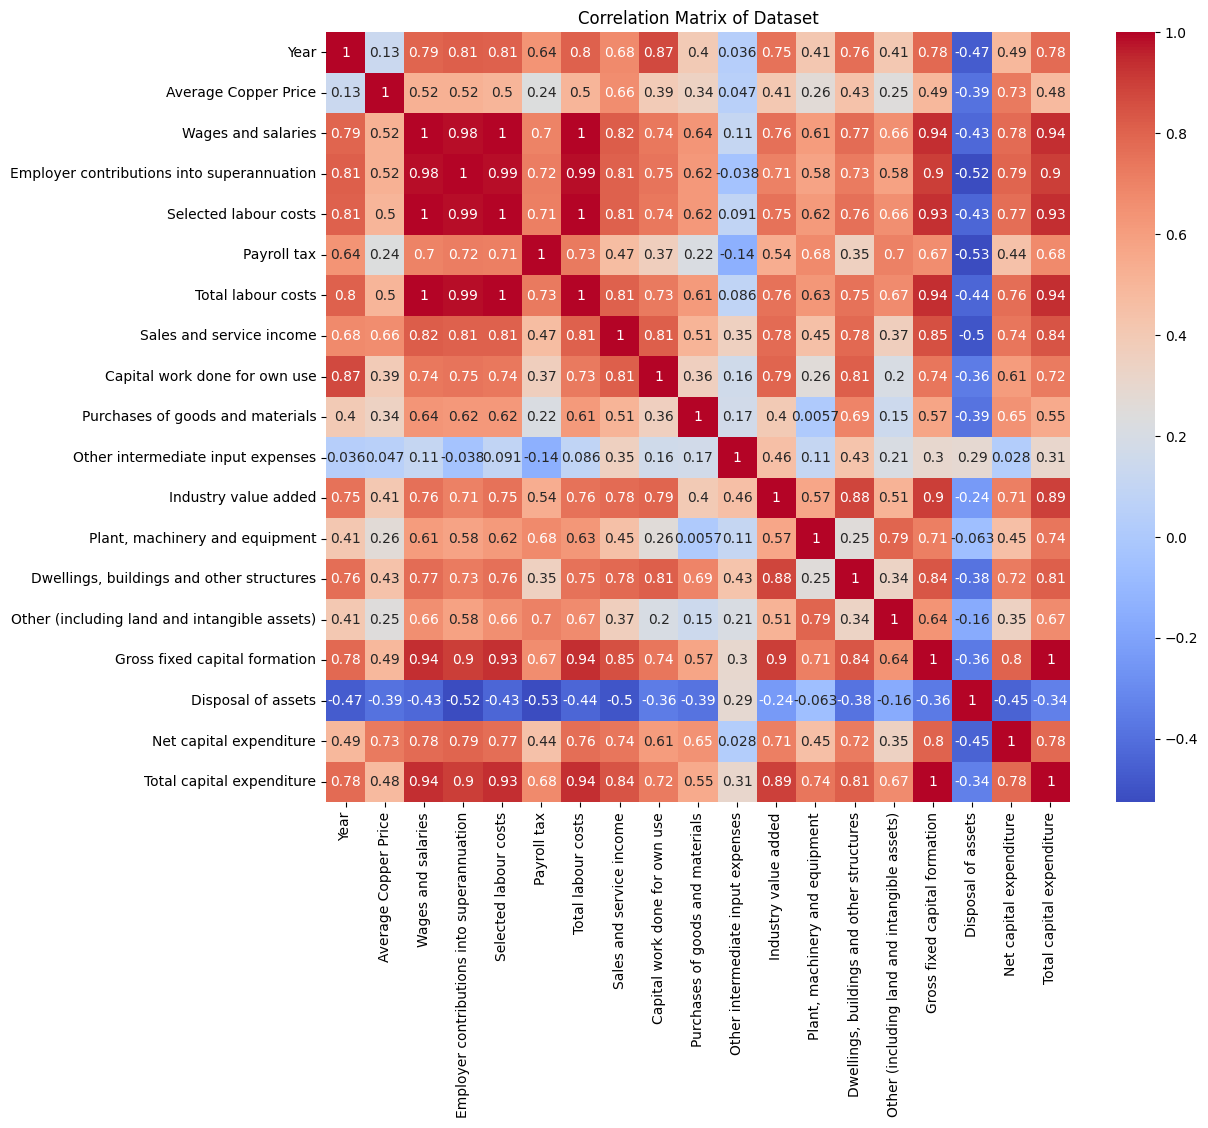

In [35]:
# Assuming df_processed is your dataframe
correlation_matrix = df_filled.corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix between variables that are processed
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Dataset')
plt.show()


In [36]:
#Load processed dataset
data = pd.read_excel('/content/gdrive/My Drive/Capstone/datasetprocessed.xlsx')

# **Wages vs Total Labour Costs (Line Chart)**

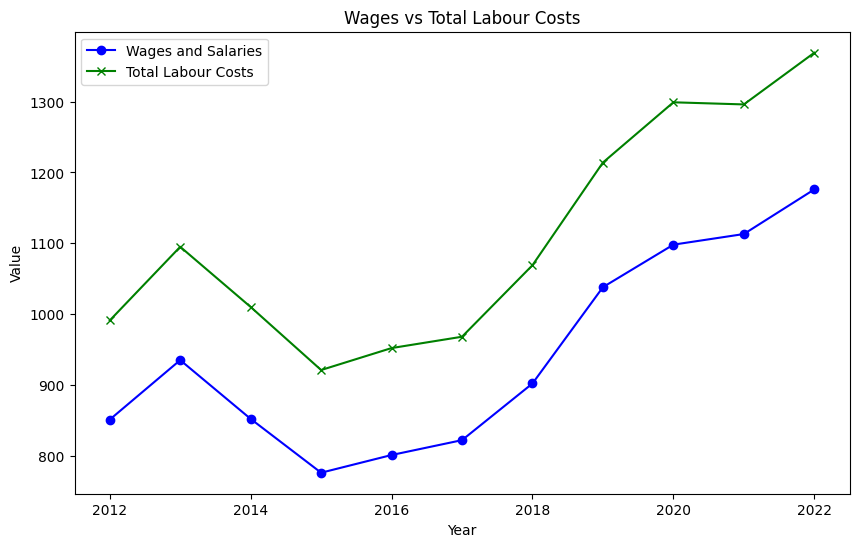

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Wages and salaries'], label='Wages and Salaries', color='blue', marker='o')
plt.plot(data['Year'], data['Total labour costs'], label='Total Labour Costs', color='green', marker='x')
plt.title('Wages vs Total Labour Costs')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()


# **Employer Contributions vs Total Labour Costs (Stacked Bar Chart)**

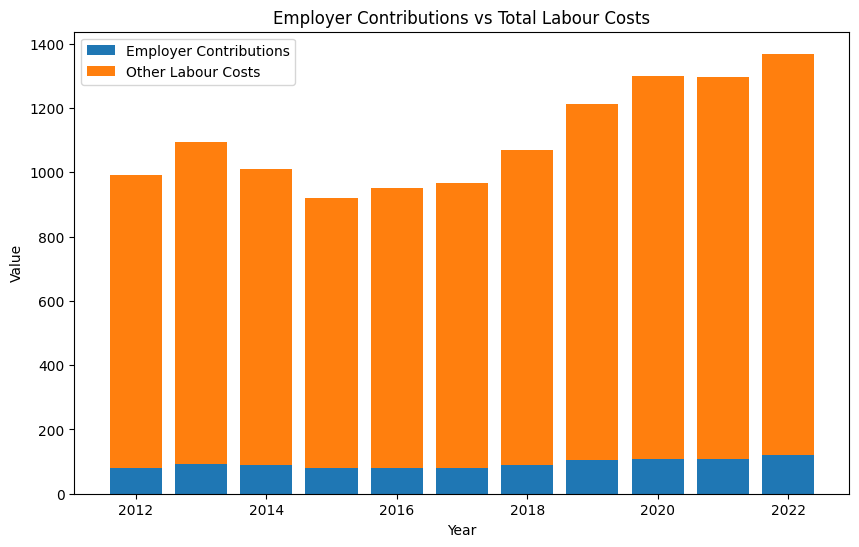

In [38]:
plt.figure(figsize=(10, 6))
plt.bar(data['Year'], data['Employer contributions into superannuation'], label='Employer Contributions')
plt.bar(data['Year'], data['Total labour costs'] - data['Employer contributions into superannuation'], bottom=data['Employer contributions into superannuation'], label='Other Labour Costs')
plt.title('Employer Contributions vs Total Labour Costs')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()


# **Sales Income vs Industry Value Added (Scatter Chart)**

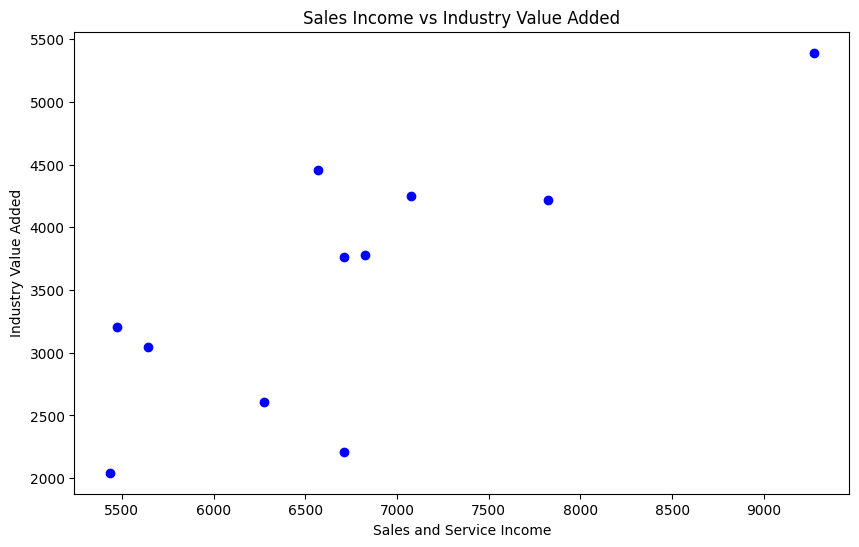

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Sales and service income'], data['Industry value added'], color='blue')
plt.title('Sales Income vs Industry Value Added')
plt.xlabel('Sales and Service Income')
plt.ylabel('Industry Value Added')
plt.show()

# **Purchases of Goods vs Other Input Expenses (Line Chart)**

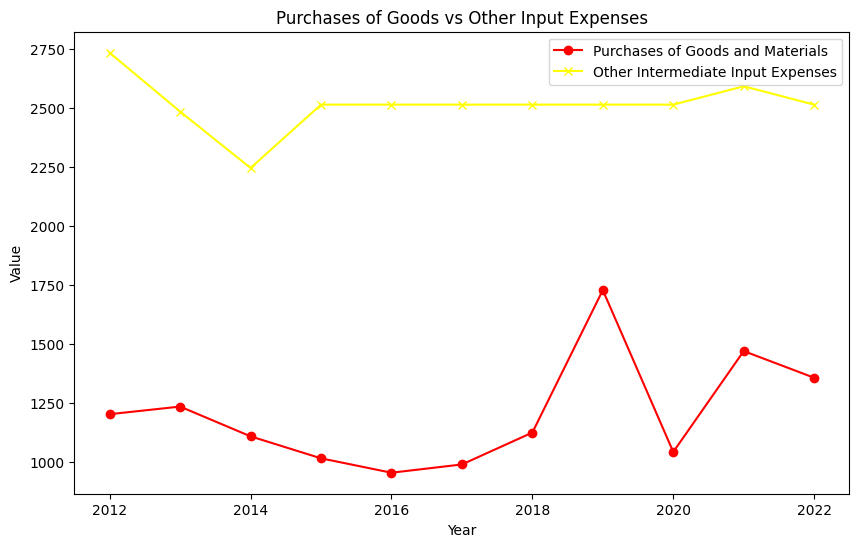

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Purchases of goods and materials'], label='Purchases of Goods and Materials', color='red', marker='o')
plt.plot(data['Year'], data['Other intermediate input expenses'], label='Other Intermediate Input Expenses', color='yellow', marker='x')
plt.title('Purchases of Goods vs Other Input Expenses')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()


# **Gross Fixed Capital vs Net Capital Expenditure (Scatter Chart)**

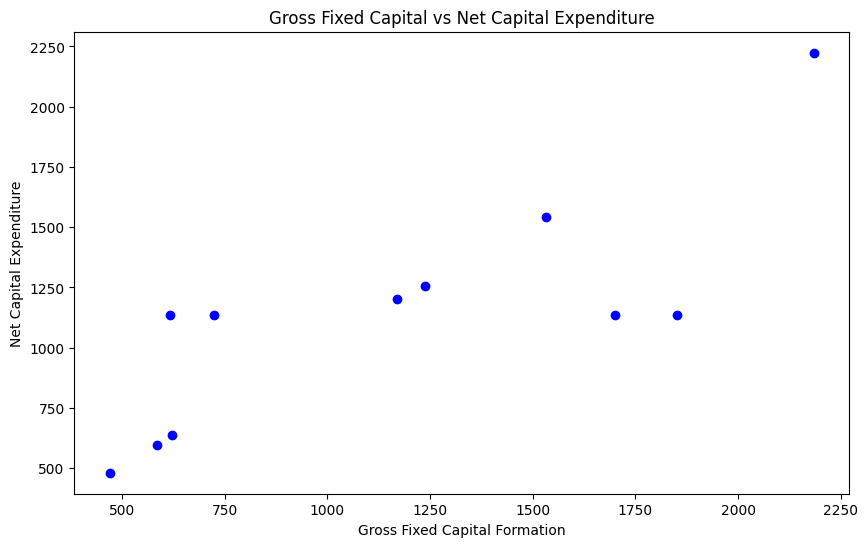

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Gross fixed capital formation'], data['Net capital expenditure'], color='blue')
plt.title('Gross Fixed Capital vs Net Capital Expenditure')
plt.xlabel('Gross Fixed Capital Formation')
plt.ylabel('Net Capital Expenditure')
plt.show()

# **Plant/Machinery vs Total Capital Expenditure (Bar Chart)**

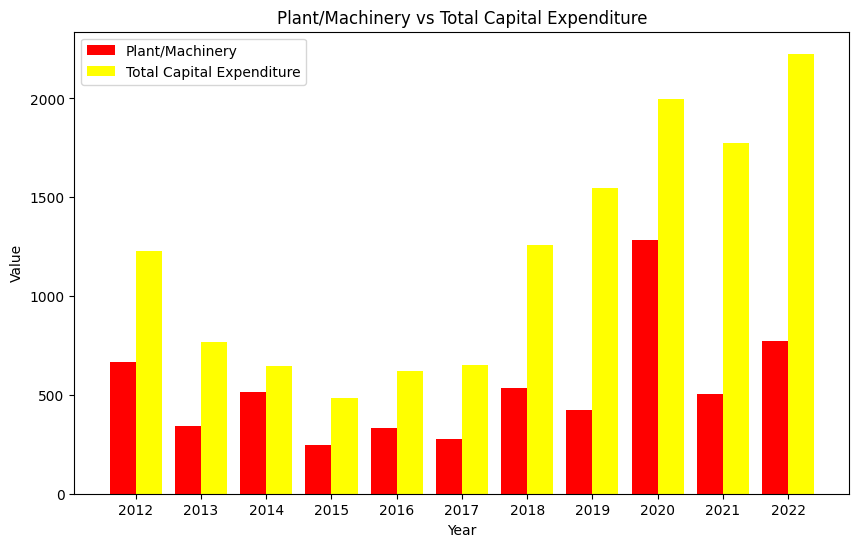

In [42]:
indices = range(len(data))
width = 0.4
plt.figure(figsize=(10, 6))
plt.bar(indices, data['Plant, machinery and equipment'], width, label='Plant/Machinery', color='red')
plt.bar([index + width for index in indices], data['Total capital expenditure'], width, label='Total Capital Expenditure', color='yellow')
plt.xticks([index + width / 2 for index in indices], data['Year'])
plt.title('Plant/Machinery vs Total Capital Expenditure')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()


# **Dwellings/Buildings vs Total Capital Expenditure (Scatter Chart)**

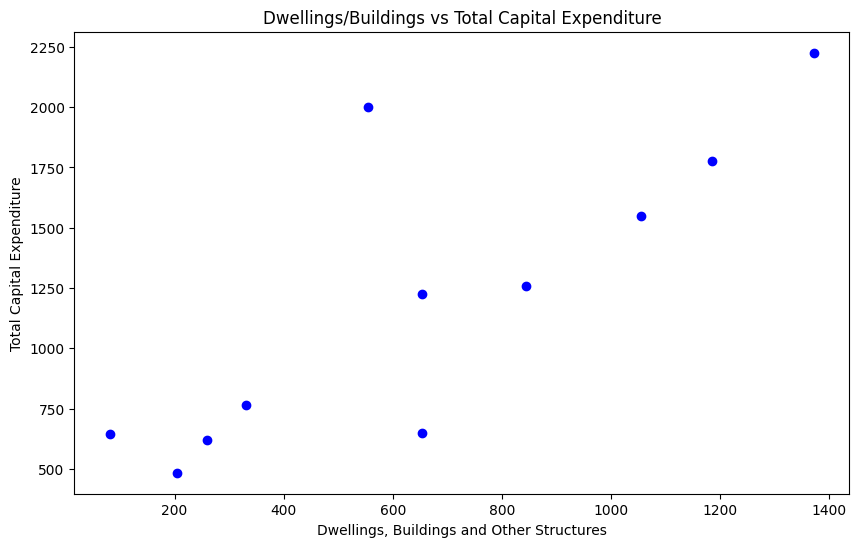

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Dwellings, buildings and other structures'], data['Total capital expenditure'], color='blue')
plt.title('Dwellings/Buildings vs Total Capital Expenditure')
plt.xlabel('Dwellings, Buildings and Other Structures')
plt.ylabel('Total Capital Expenditure')
plt.show()


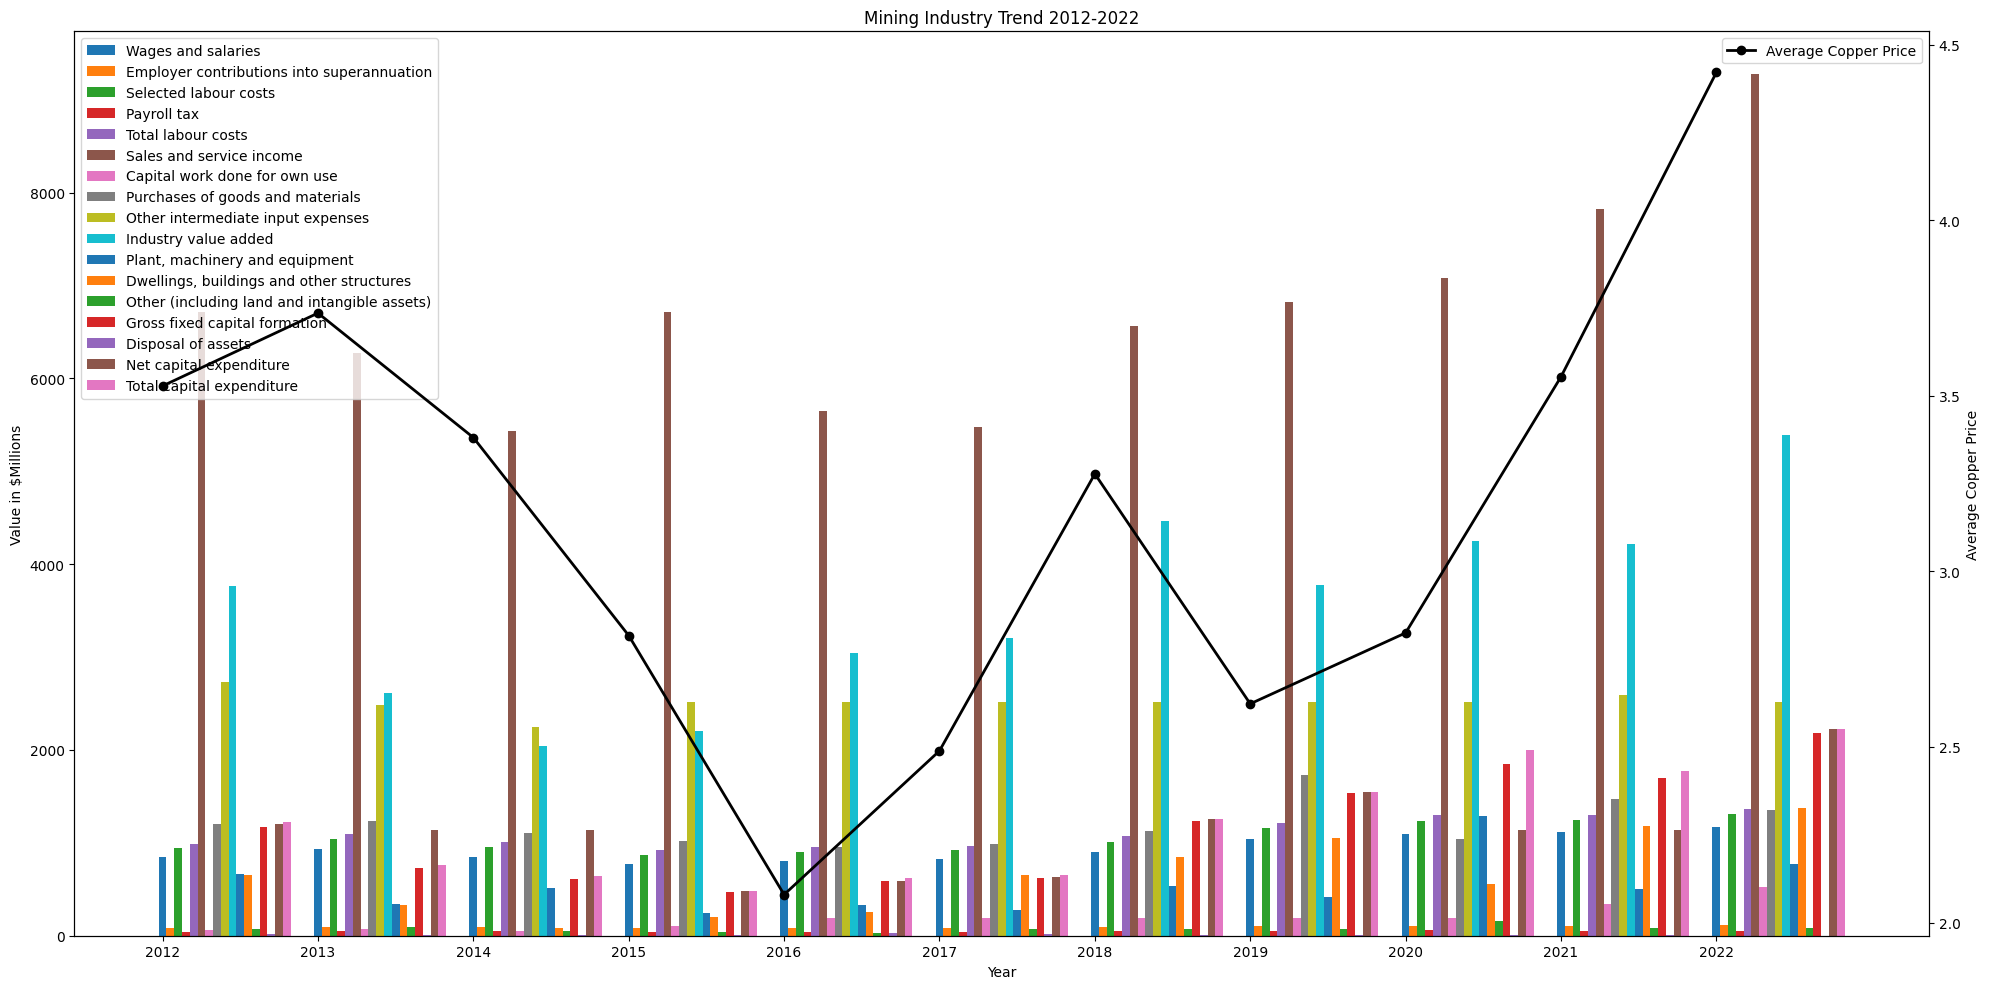

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Find the exact name of the 'Average Copper Price' column
copper_price_col = [col for col in data.columns if 'Copper' in col][0]

# Set the figure size
plt.figure(figsize=(20, 10))

# Create a subplot for the bar chart
ax1 = plt.subplot(1, 1, 1)

# Exclude unwanted columns like 'Unnamed: 0', 'Year', and the copper price column
columns_to_plot = data.columns[~data.columns.isin(['Unnamed: 0', 'Year', copper_price_col])]

# Number of bars per group
n_bars = len(columns_to_plot)

# Set the location of the bars
bar_width = 0.85
index = np.arange(len(data['Year']))

# Create bar plots for each variable except 'Average Copper Price'
for i, column in enumerate(columns_to_plot):
    ax1.bar(index + bar_width / n_bars * i, data[column], bar_width / n_bars, label=column)

# Set chart details for the bar chart
ax1.set_xticks(index)
ax1.set_xticklabels(data['Year'])
ax1.set_xlabel('Year')
ax1.set_ylabel('Value in $Millions')
ax1.set_title('Mining Industry Trend 2012-2022')

# Create a secondary y-axis for the line plot
ax2 = ax1.twinx()
ax2.plot(index, data[copper_price_col], label=copper_price_col, color='black', marker='o', linewidth=2)

# Set chart details for the line chart
ax2.set_ylabel('Average Copper Price')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()
